In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

# OpenCV 출력
from google.colab.patches import cv2_imshow

# Yolov3 모델(PyTorch)

In [ ]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3

fatal: destination path 'yolov3' already exists and is not an empty directory.
/content/yolov3


In [ ]:
%pip install -r requirements.txt

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [ ]:
!ls data/images/

bus.jpg  zidane.jpg


In [ ]:
import yaml
import torch
from IPython.display import Image, clear_output

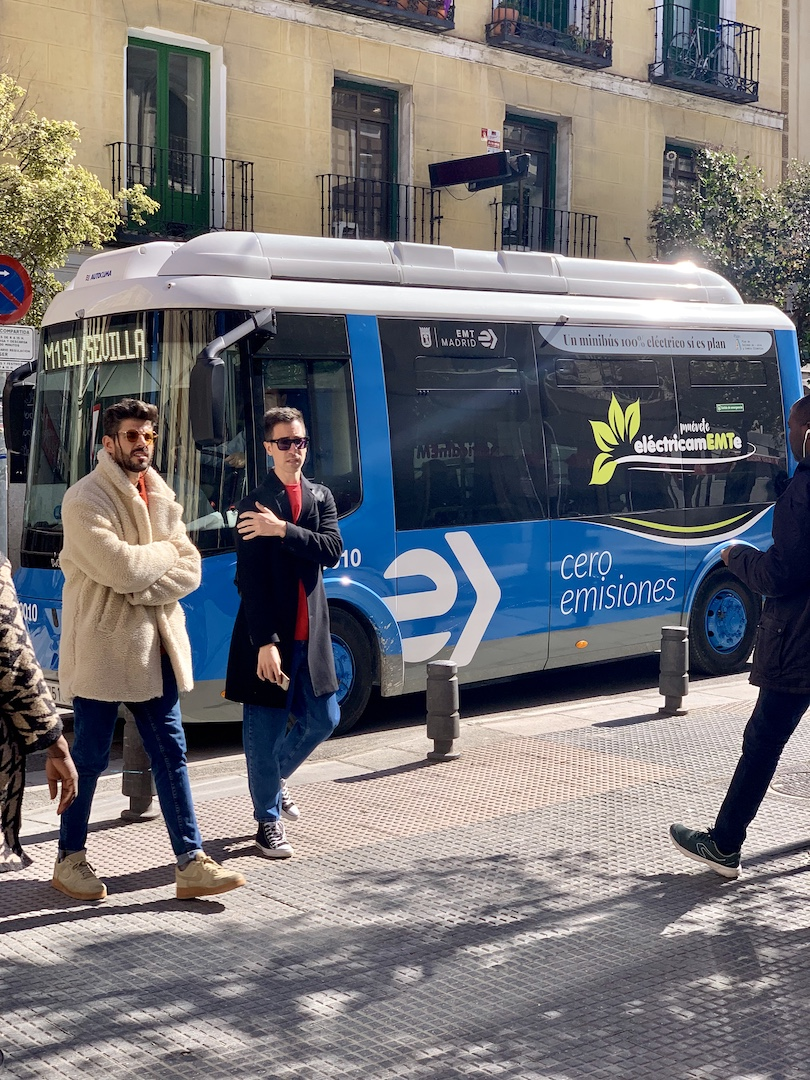

In [ ]:
Image(filename='/content/yolov3/data/images/bus.jpg', width=600)

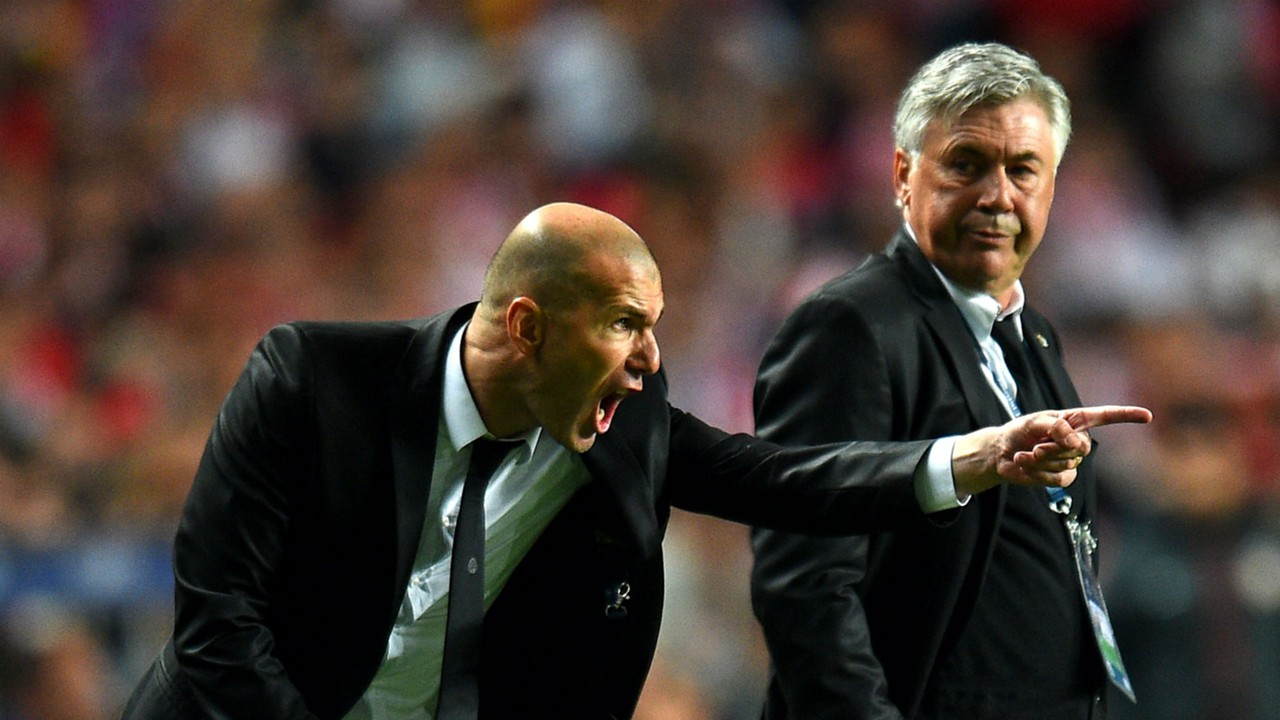

In [ ]:
Image(filename='/content/yolov3/data/images/zidane.jpg', width=600)

In [ ]:
!python detect.py --weight yolov3.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov3.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-179-gfd91796 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 119M/119M [00:00<00:00, 426MB/s] 

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients, 155.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, 81.5ms
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 161.1ms
Speed: 1.7ms pre-process, 121.3ms inference, 750.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to r

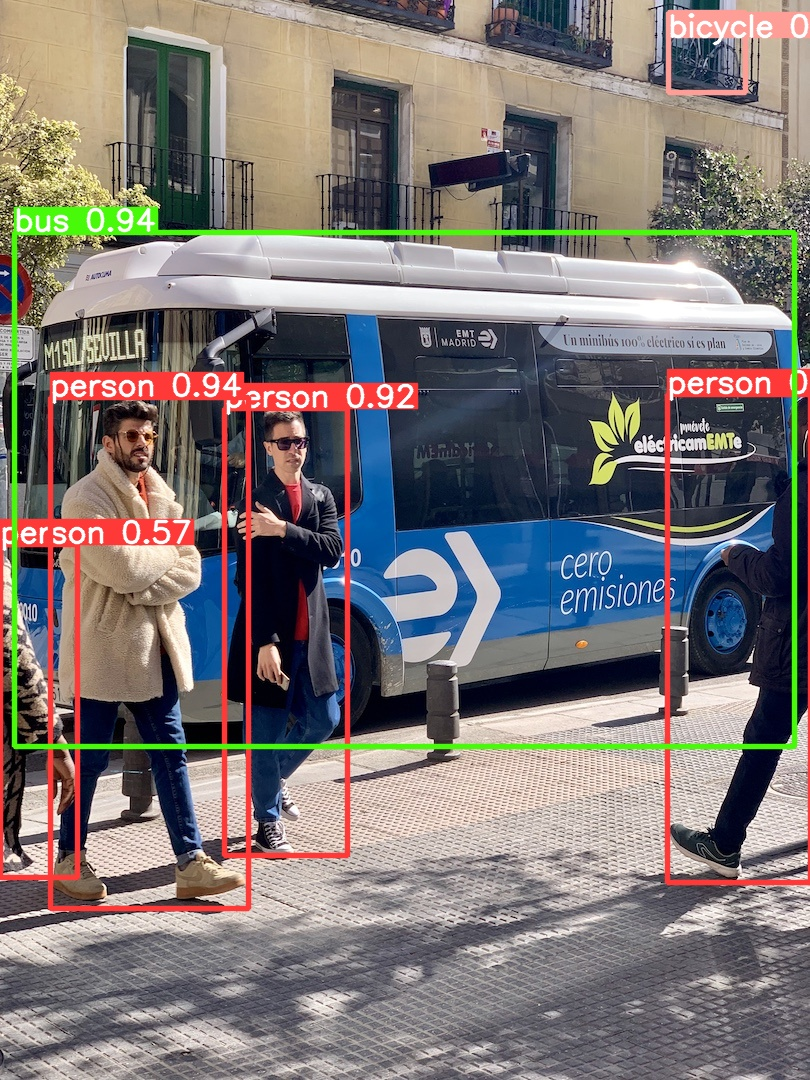

In [ ]:
Image(filename='/content/yolov3/runs/detect/exp/bus.jpg', width=600)

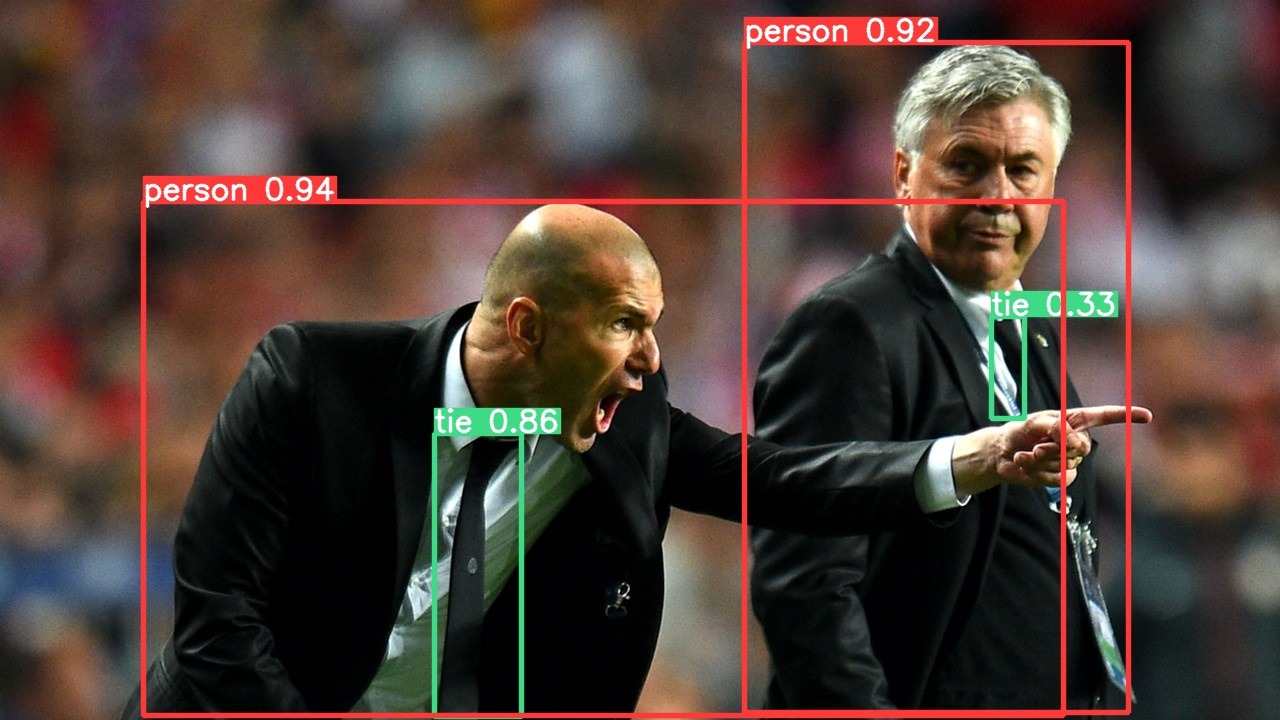

In [ ]:
Image(filename='/content/yolov3/runs/detect/exp/zidane.jpg', width=600)

# Yolov5

In [ ]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16620, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 16620 (delta 55), reused 63 (delta 29), pack-reused 16522
Receiving objects: 100% (16620/16620), 15.16 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (11412/11412), done.
/content/yolov5


In [ ]:
# 포트홀 탐지

# 데이터셋 다운
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole
!curl -L "https://public.roboflow.com/ds/WxTzCv7bJ2?key=xuT4zLySD3" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5/pothole
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1636      0 --:--:-- --:--:-- --:--:--  1639
100 46.0M  100 46.0M    0     0  9988k      0  0:00:04  0:00:04 --:--:-- 12.1M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 ext

In [ ]:
!ls /content/yolov5/pothole/test/images

img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg
img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg
img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg
img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg
img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg
img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg
img-195_jpg.rf.f77a8f4d432a9a89235168ff8e09a650.jpg
img-196_jpg.rf.c1e105382a0bb8d329959cea45173cdf.jpg
img-217_jpg.rf.20e267cdb167c43140e67ec9f5328040.jpg
img-238_jpg.rf.f146df7999e374dbeaba65f92c518159.jpg
img-23_jpg.rf.e6aa0daf83e72ccbf1ea10eb6a6ab3bd.jpg
img-245_jpg.rf.1c9b49a366bda1cf64dbfac2a946cd38.jpg
img-264_jpg.rf.a98f3f39b1afdea9ce3155bbe107c6c1.jpg
img-269_jpg.rf.f51d9eb8d02a34ac01d4a486cbfbdd4f.jpg
img-276_jpg.rf.acc167b63d79ab3b99fd64b4109f86d4.jpg
img-282_jpg.rf.a0ac2a228cf0edb961017e538356b5af.jpg
img-294_jpg.rf.a16953e9091e3eecfc338ed3044ef294.jpg
img-300_jpg.rf.6b7b035dff1cda092ce3dc22be8d0135.jpg
img-307_jpg.rf.65a7065124972969c3efbbca04122668.jpg
img-308_jpg.r

In [ ]:
from glob import glob
test_img_list=glob('/content/yolov5/pothole/test/images/*.jpg')
train_img_list=glob('/content/yolov5/pothole/train/images/*.jpg')
valid_img_list=glob('/content/yolov5/pothole/valid/images/*.jpg')

In [ ]:
print(len(test_img_list), len(train_img_list), len(valid_img_list))

67 465 133


In [ ]:
import yaml

with open('/content/yolov5/pothole/train.txt','w') as f:
    f.write('\n'.join(train_img_list)+'\n')
with open('/content/yolov5/pothole/test.txt','w') as f:
    f.write('\n'.join(test_img_list)+'\n')
with open('/content/yolov5/pothole/valid.txt','w') as f:
    f.write('\n'.join(valid_img_list)+'\n')

In [ ]:
from IPython.core.magic import register_line_cell_magic

In [ ]:
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line,'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%cat /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [ ]:
%%writetemplate /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']

In [ ]:
%cat /content/yolov5/pothole/data.yaml


train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']


In [ ]:
# 모델 구성
with open('/content/yolov5/pothole/data.yaml','r') as steam:
    num_classes=str(yaml.safe_load(steam)['nc'])

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

# 학습
* img : 입력 이미지 크기
* batch : 배치 크기(32, 16) => 클수록 사양이 좋아야 함
* epochs : 학습 기간 개수
* data : yaml 파일 경로
* cfg : 모델 구성 지정
* weight : 가중치에 대한 경로 지정
* name : 결과이름
* cache : 빠른 학습을 위한 이미지 캐시

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epoch 50 --data ./pothole/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name pothole_results --cache

/content/yolov5
2024-05-22 02:32:02.042773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 02:32:02.042835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 02:32:02.046934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=./models/yolov5s.yaml, data=./pothole/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

In [ ]:
!ls ./runs/train/pothole_results

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1716345128.70341bbc4b74.1648.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


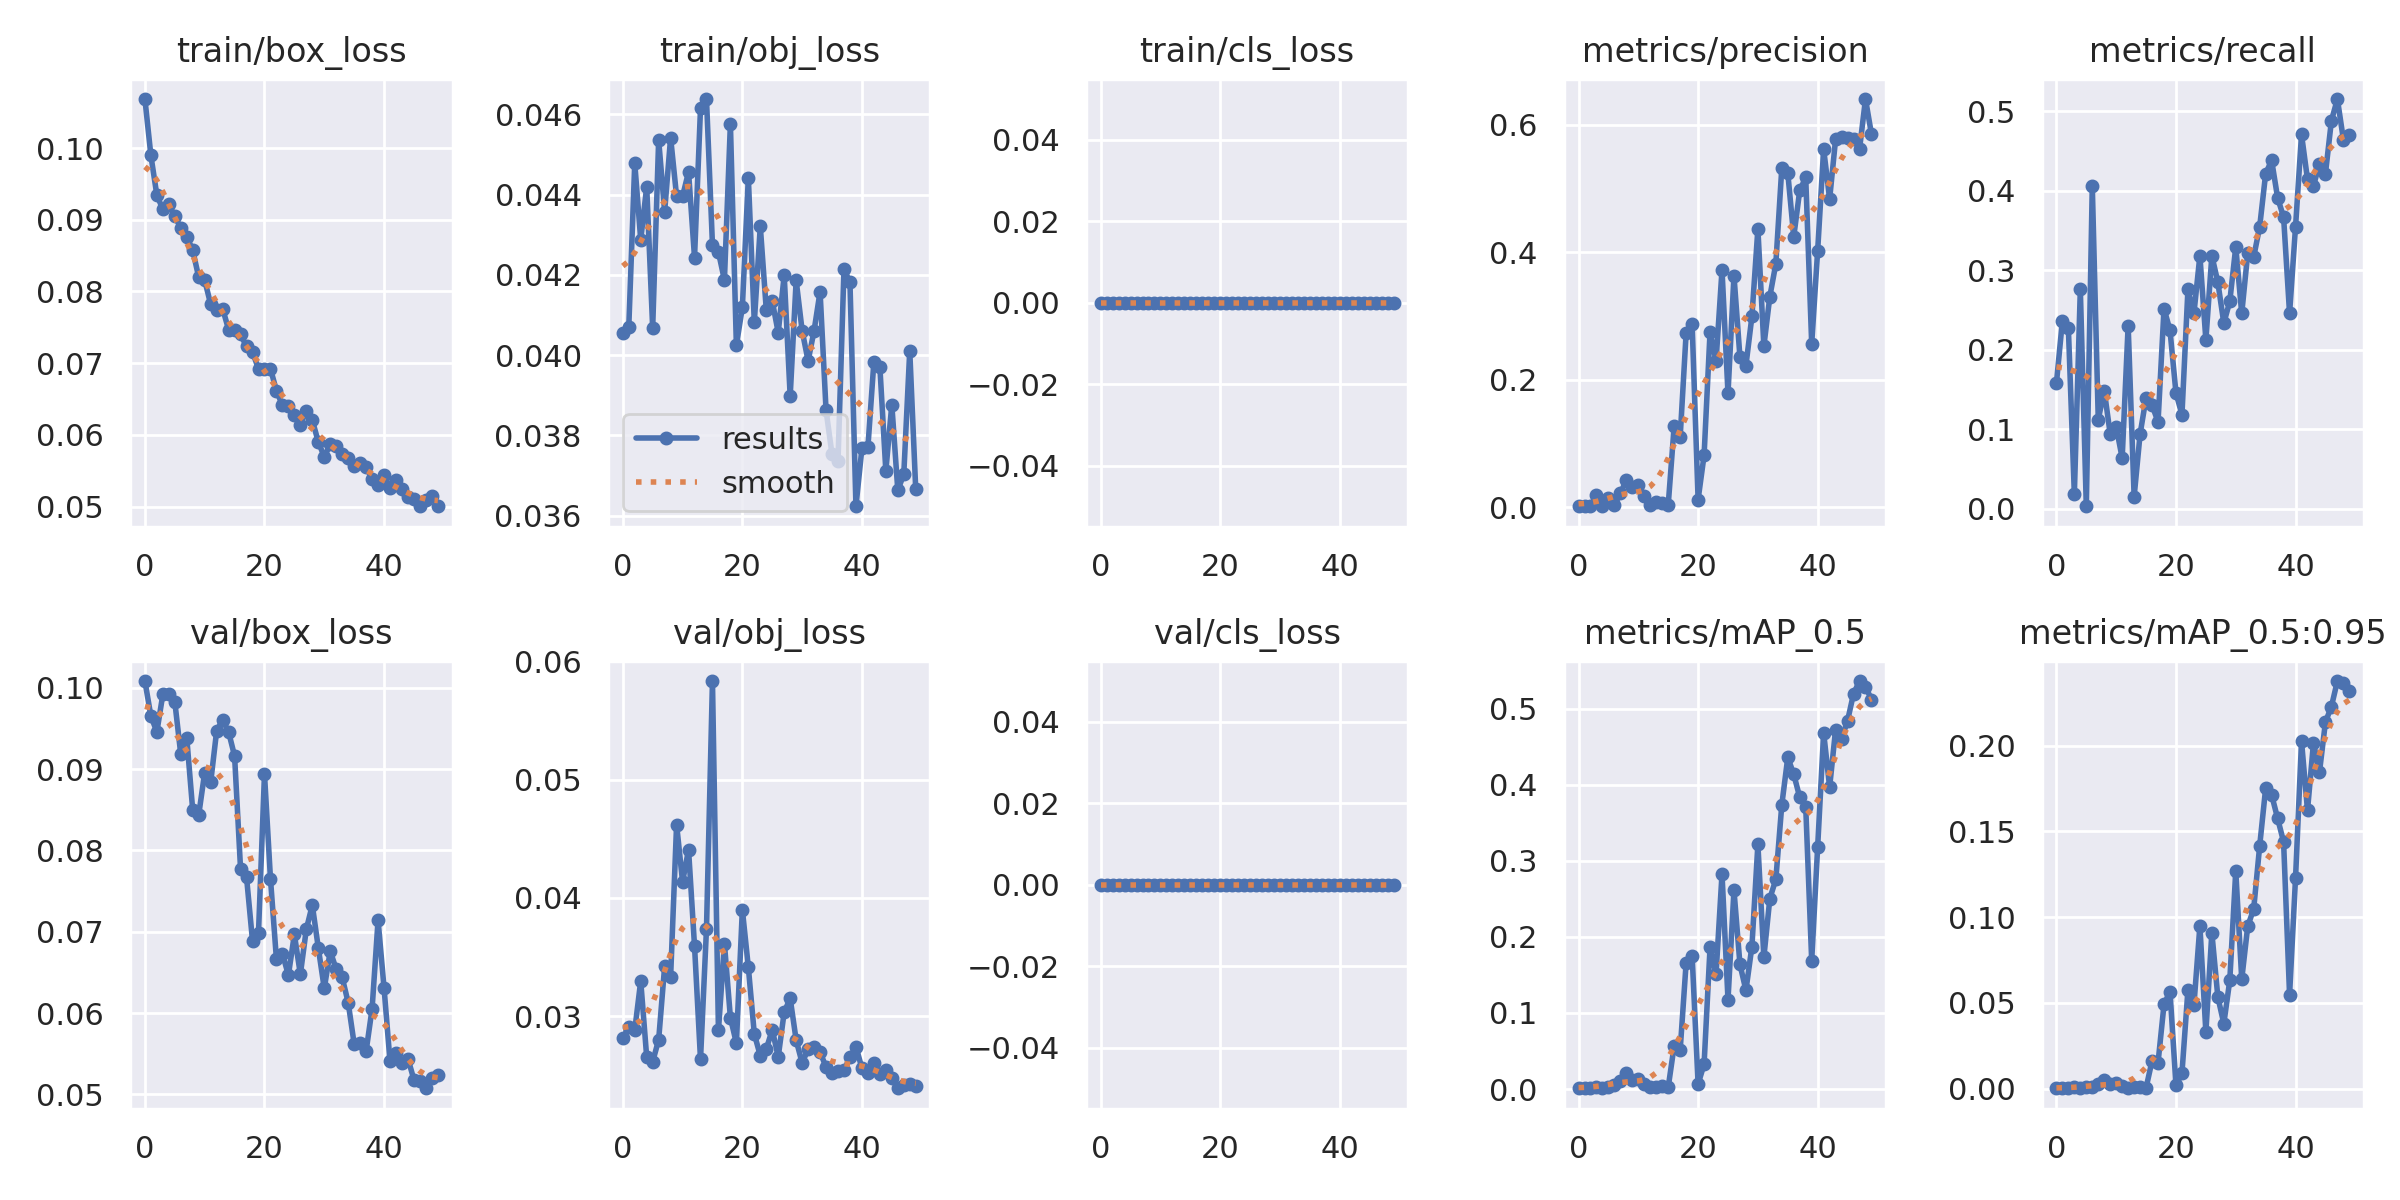

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/results.png', width=1000)

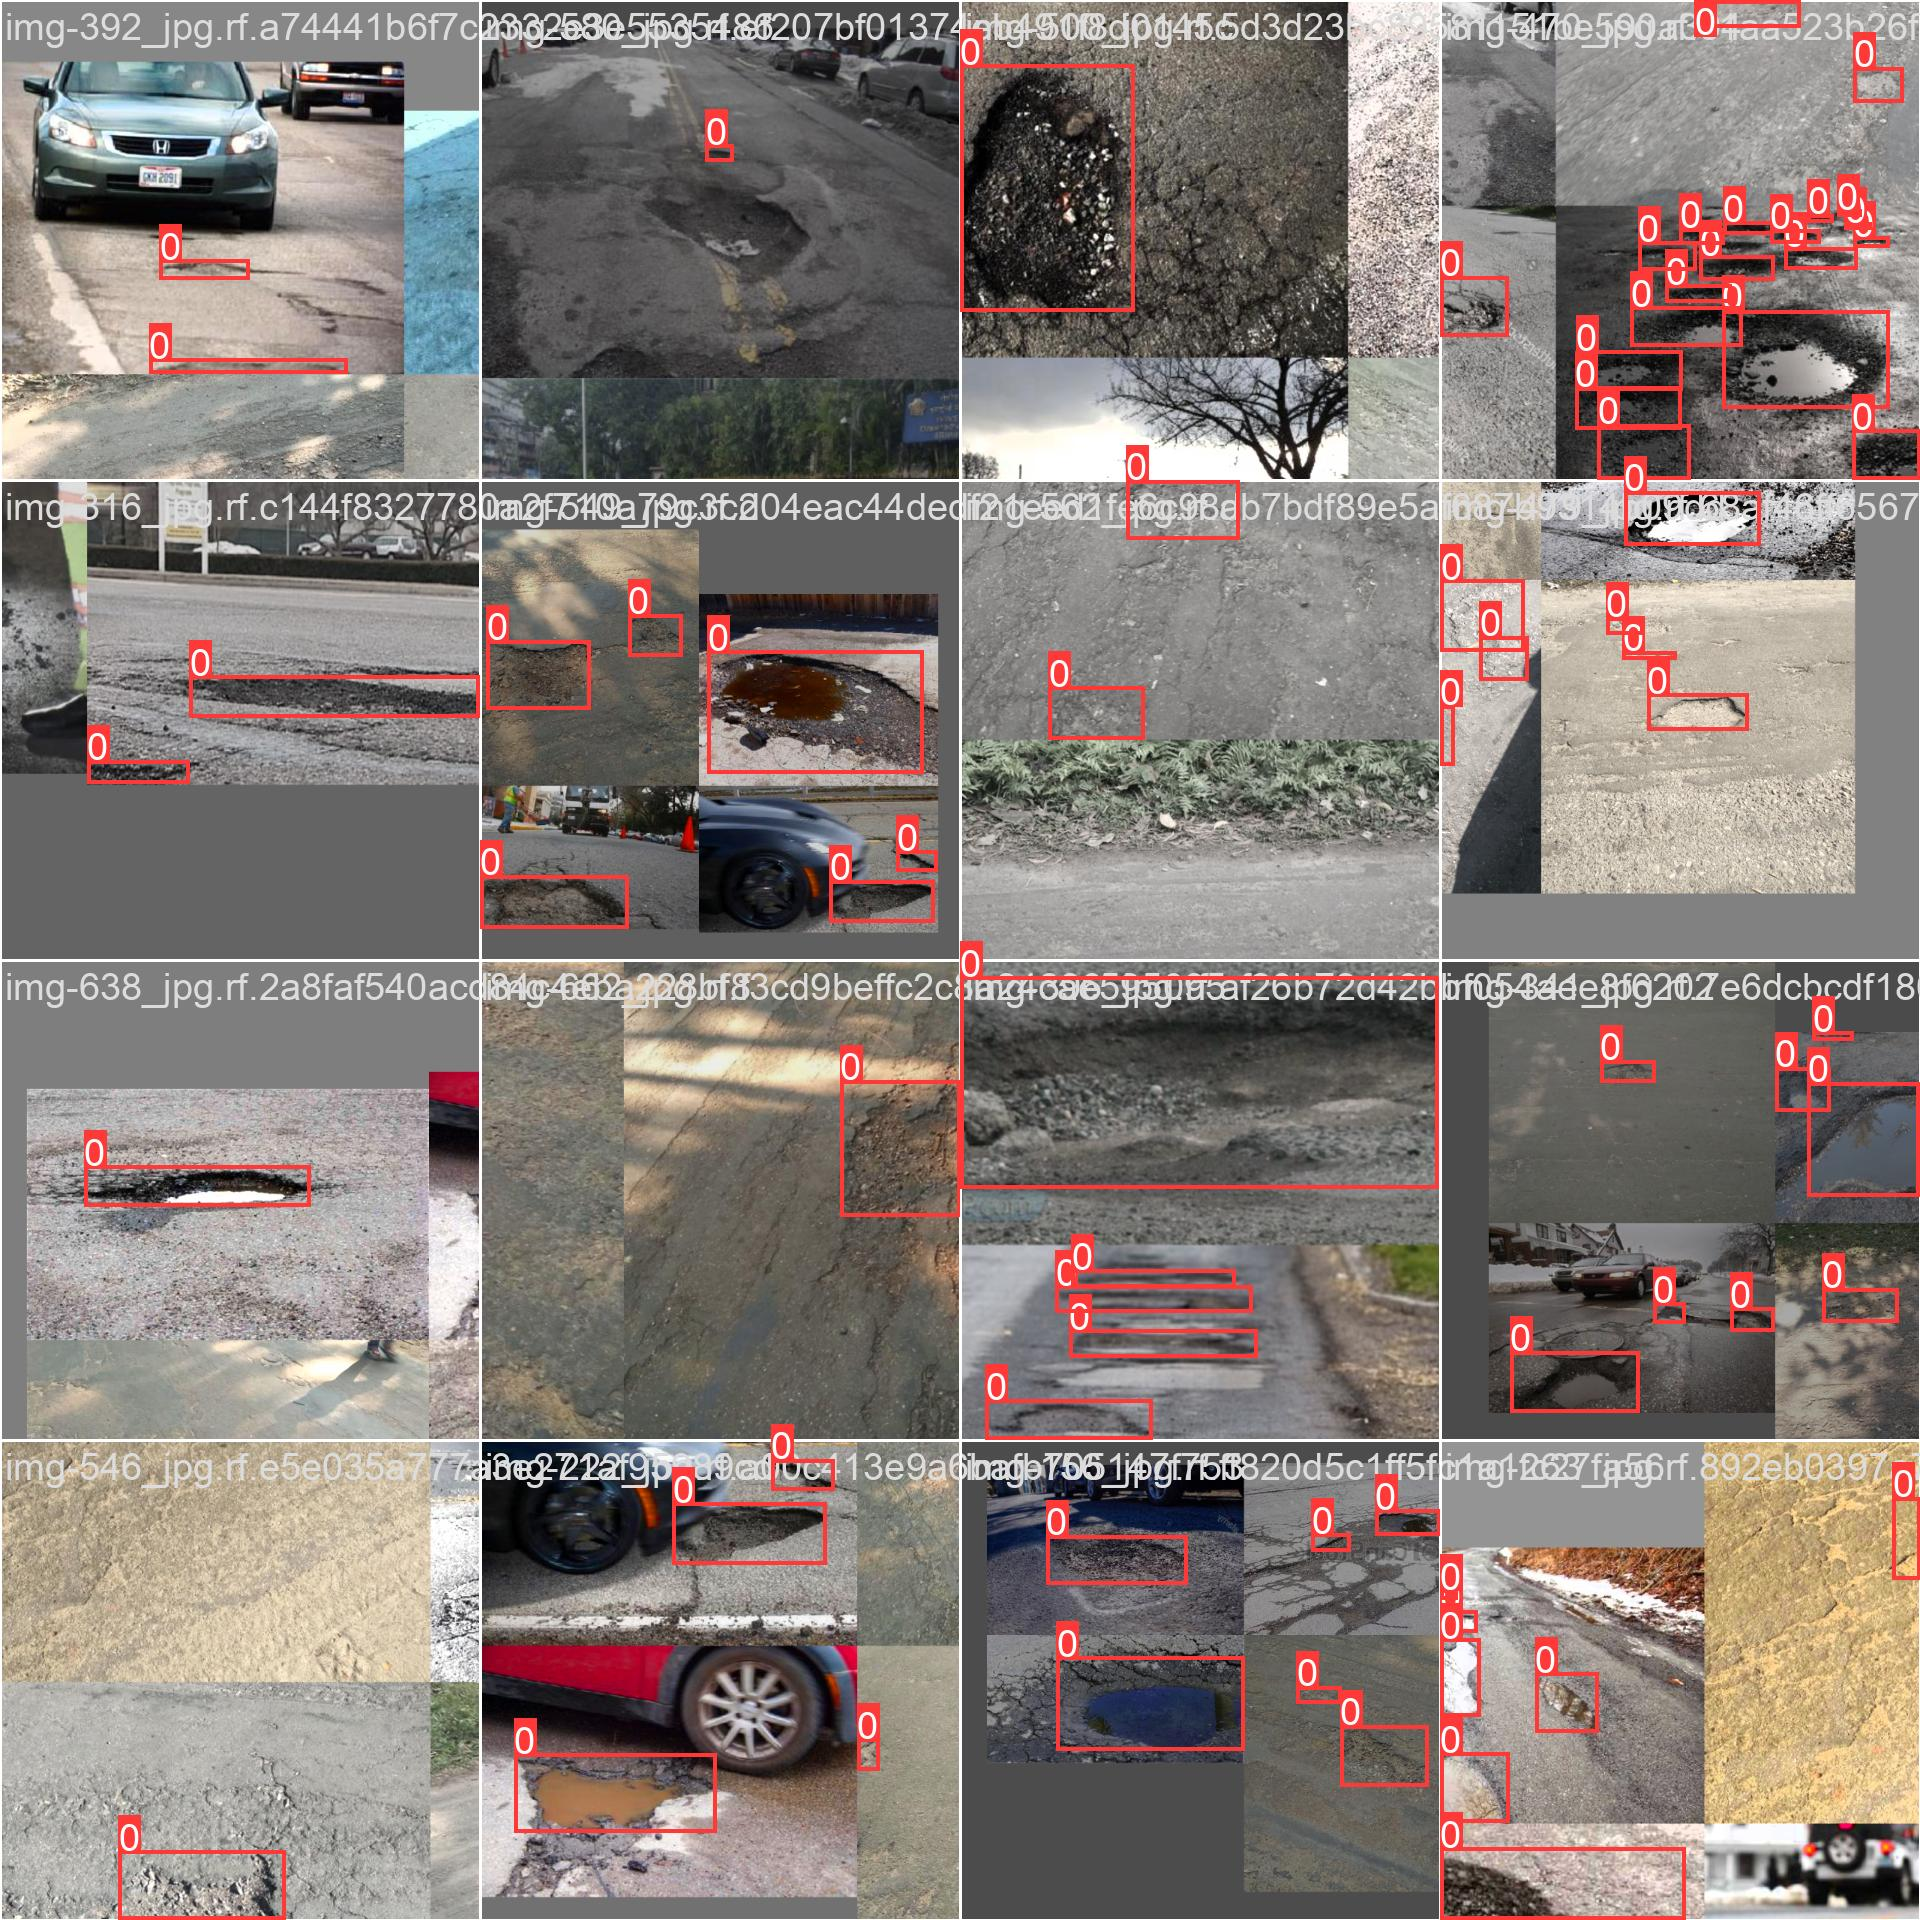

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/train_batch0.jpg', width=1000)

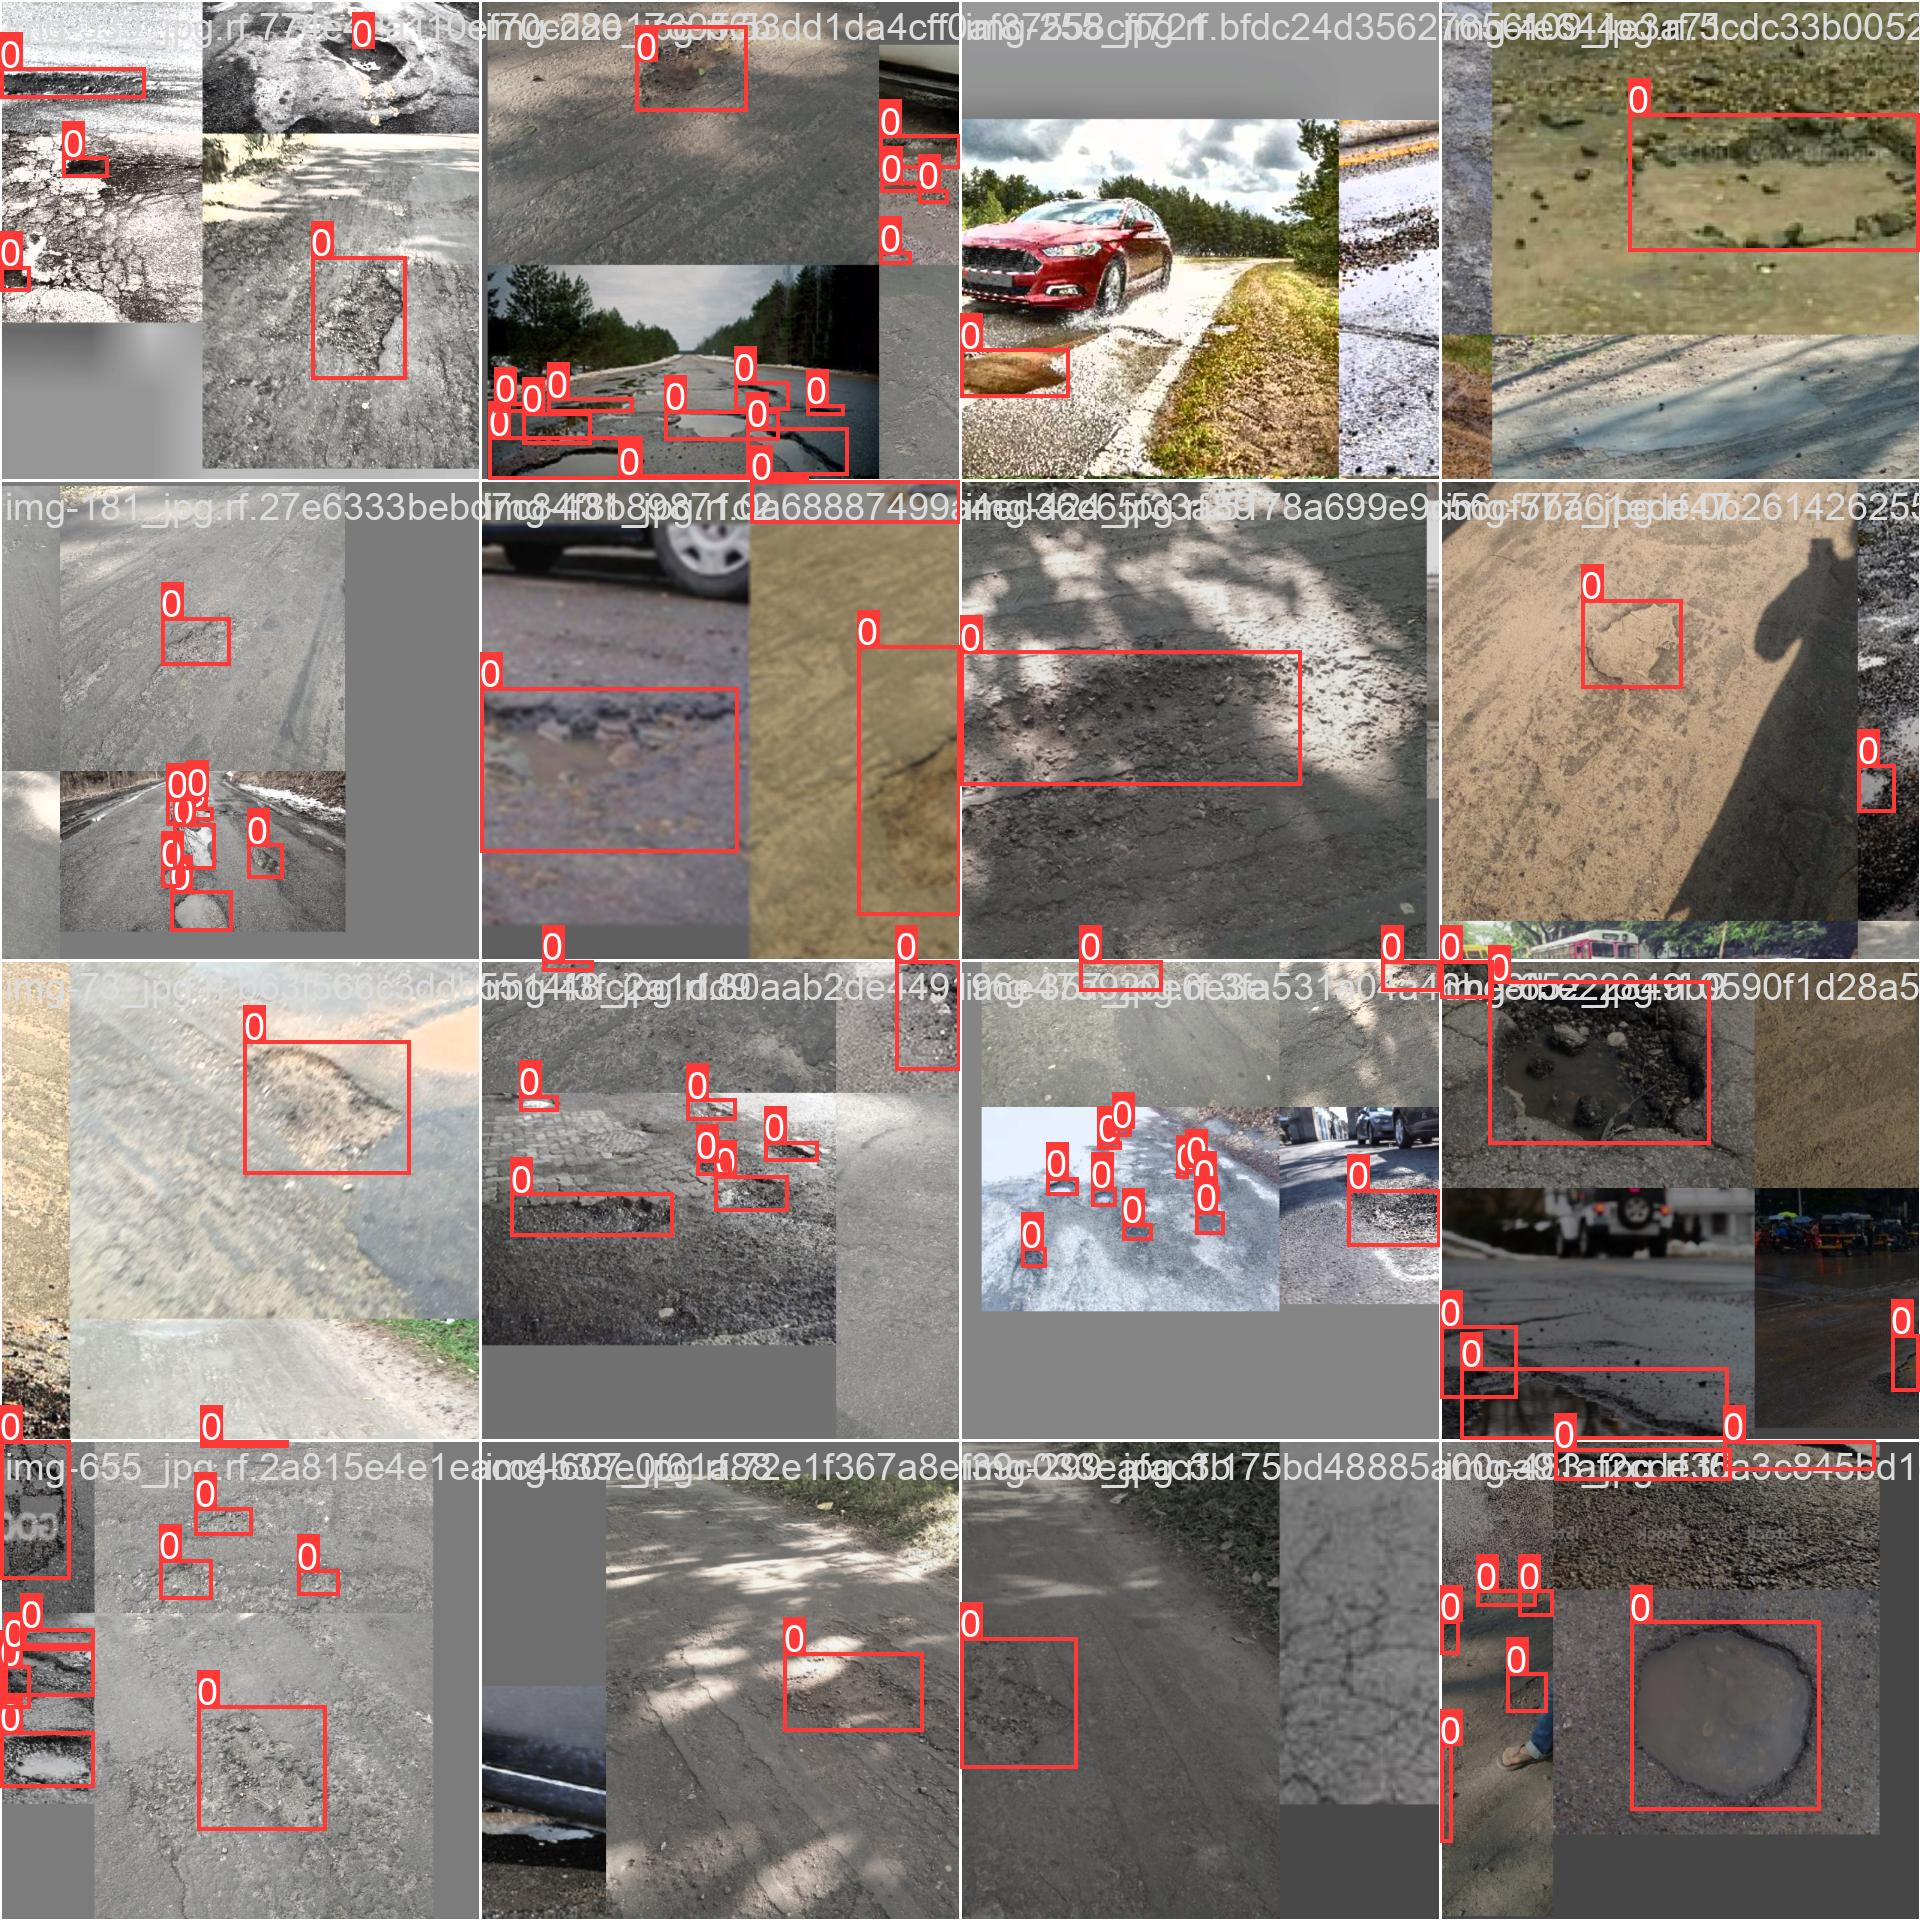

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/train_batch1.jpg', width=1000)

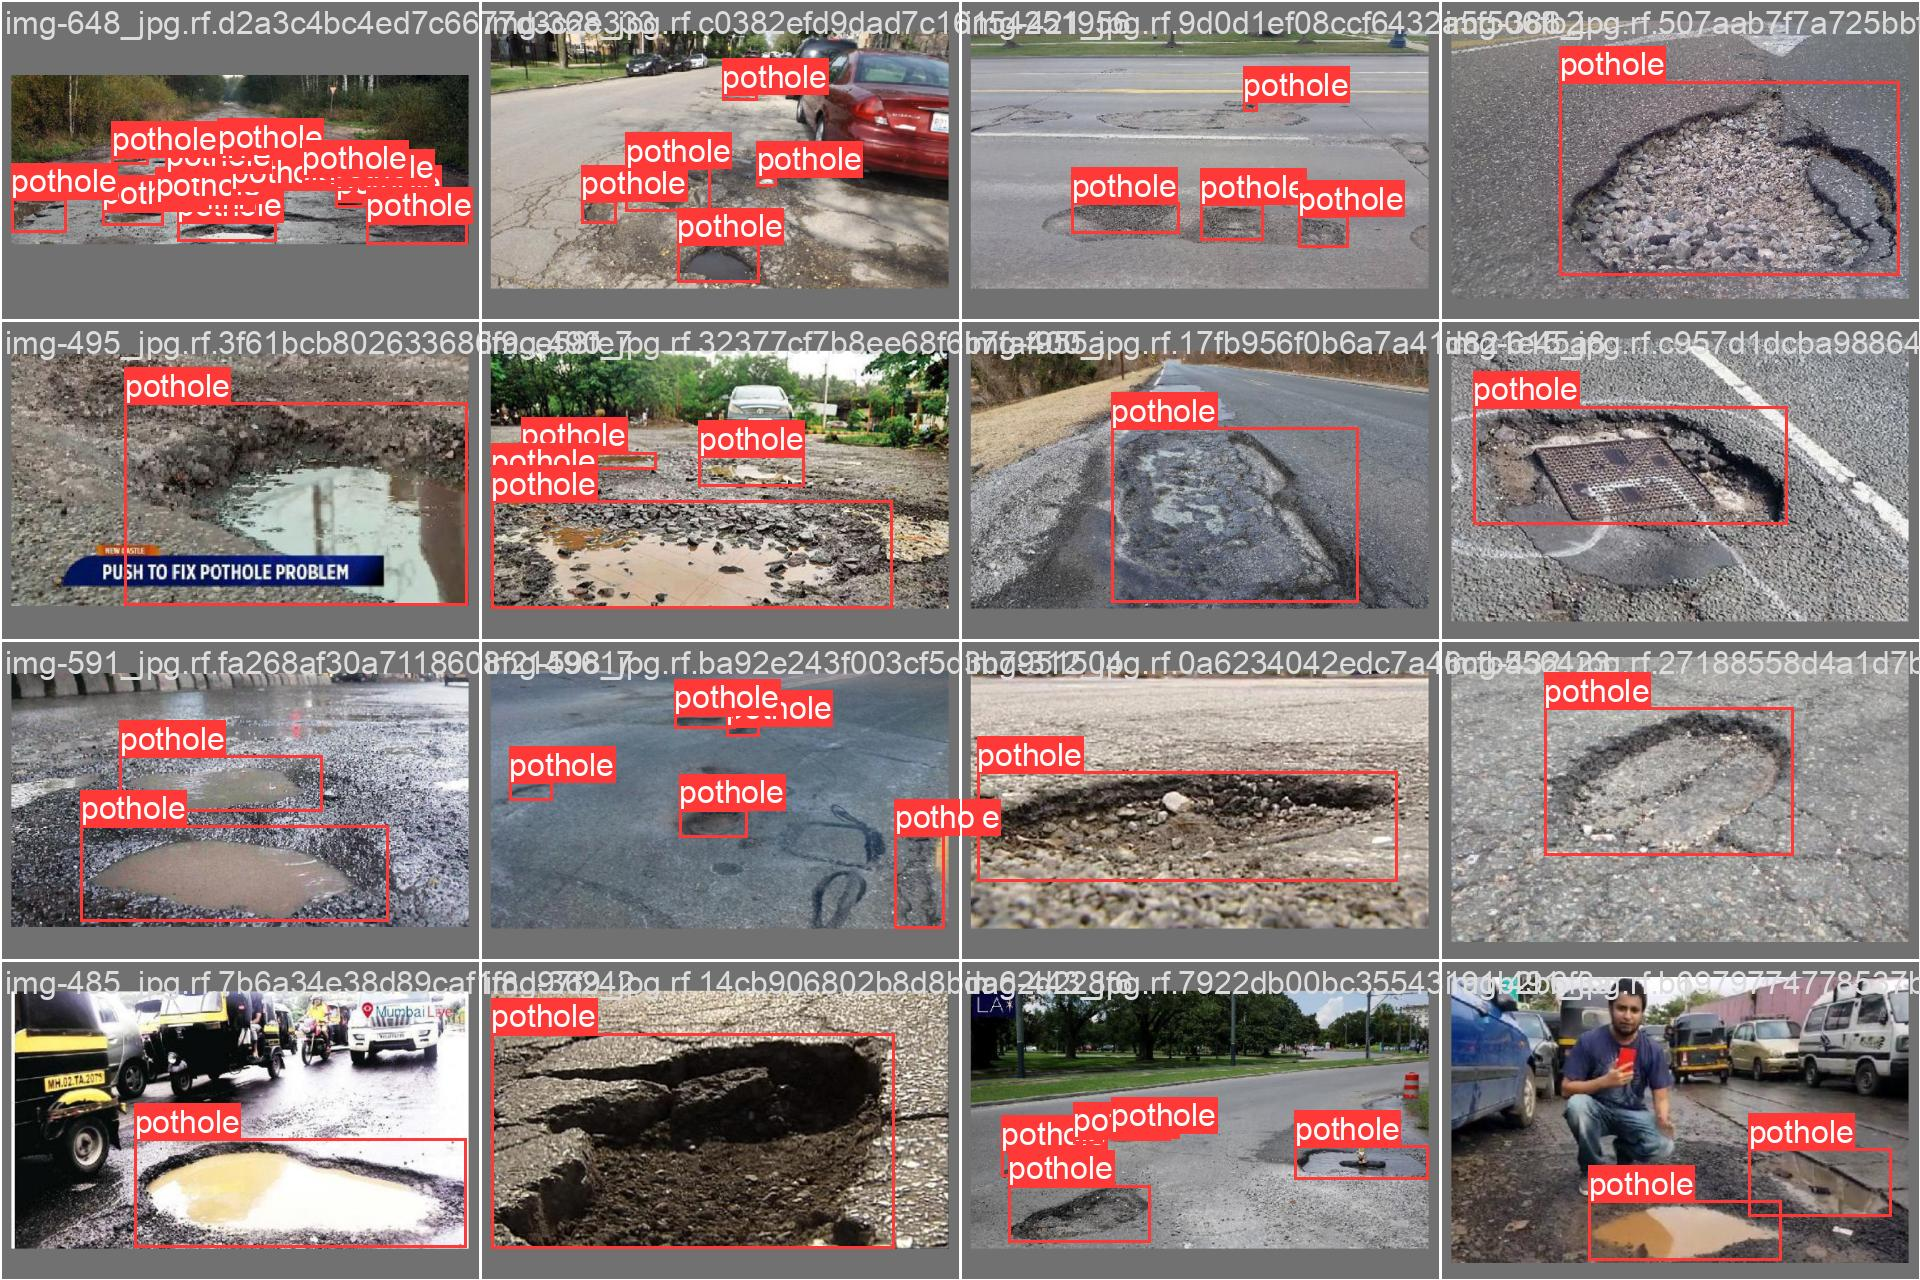

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/val_batch0_labels.jpg', width=1000)

In [ ]:
# 검증
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --iou 0.65 --half # 배치 사이즈를 지정하지 않으면 기본값 32

val: data=./pothole/data.yaml, weights=['runs/train/pothole_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pothole/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:07<00:00,  1.52s/it]
                   all        133        330      0.515      0.513      0.516      0.235
Speed: 0.2ms pre-process, 26.5ms inference, 13.6ms NMS per image at shape (32, 3, 640, 640)
Results saved

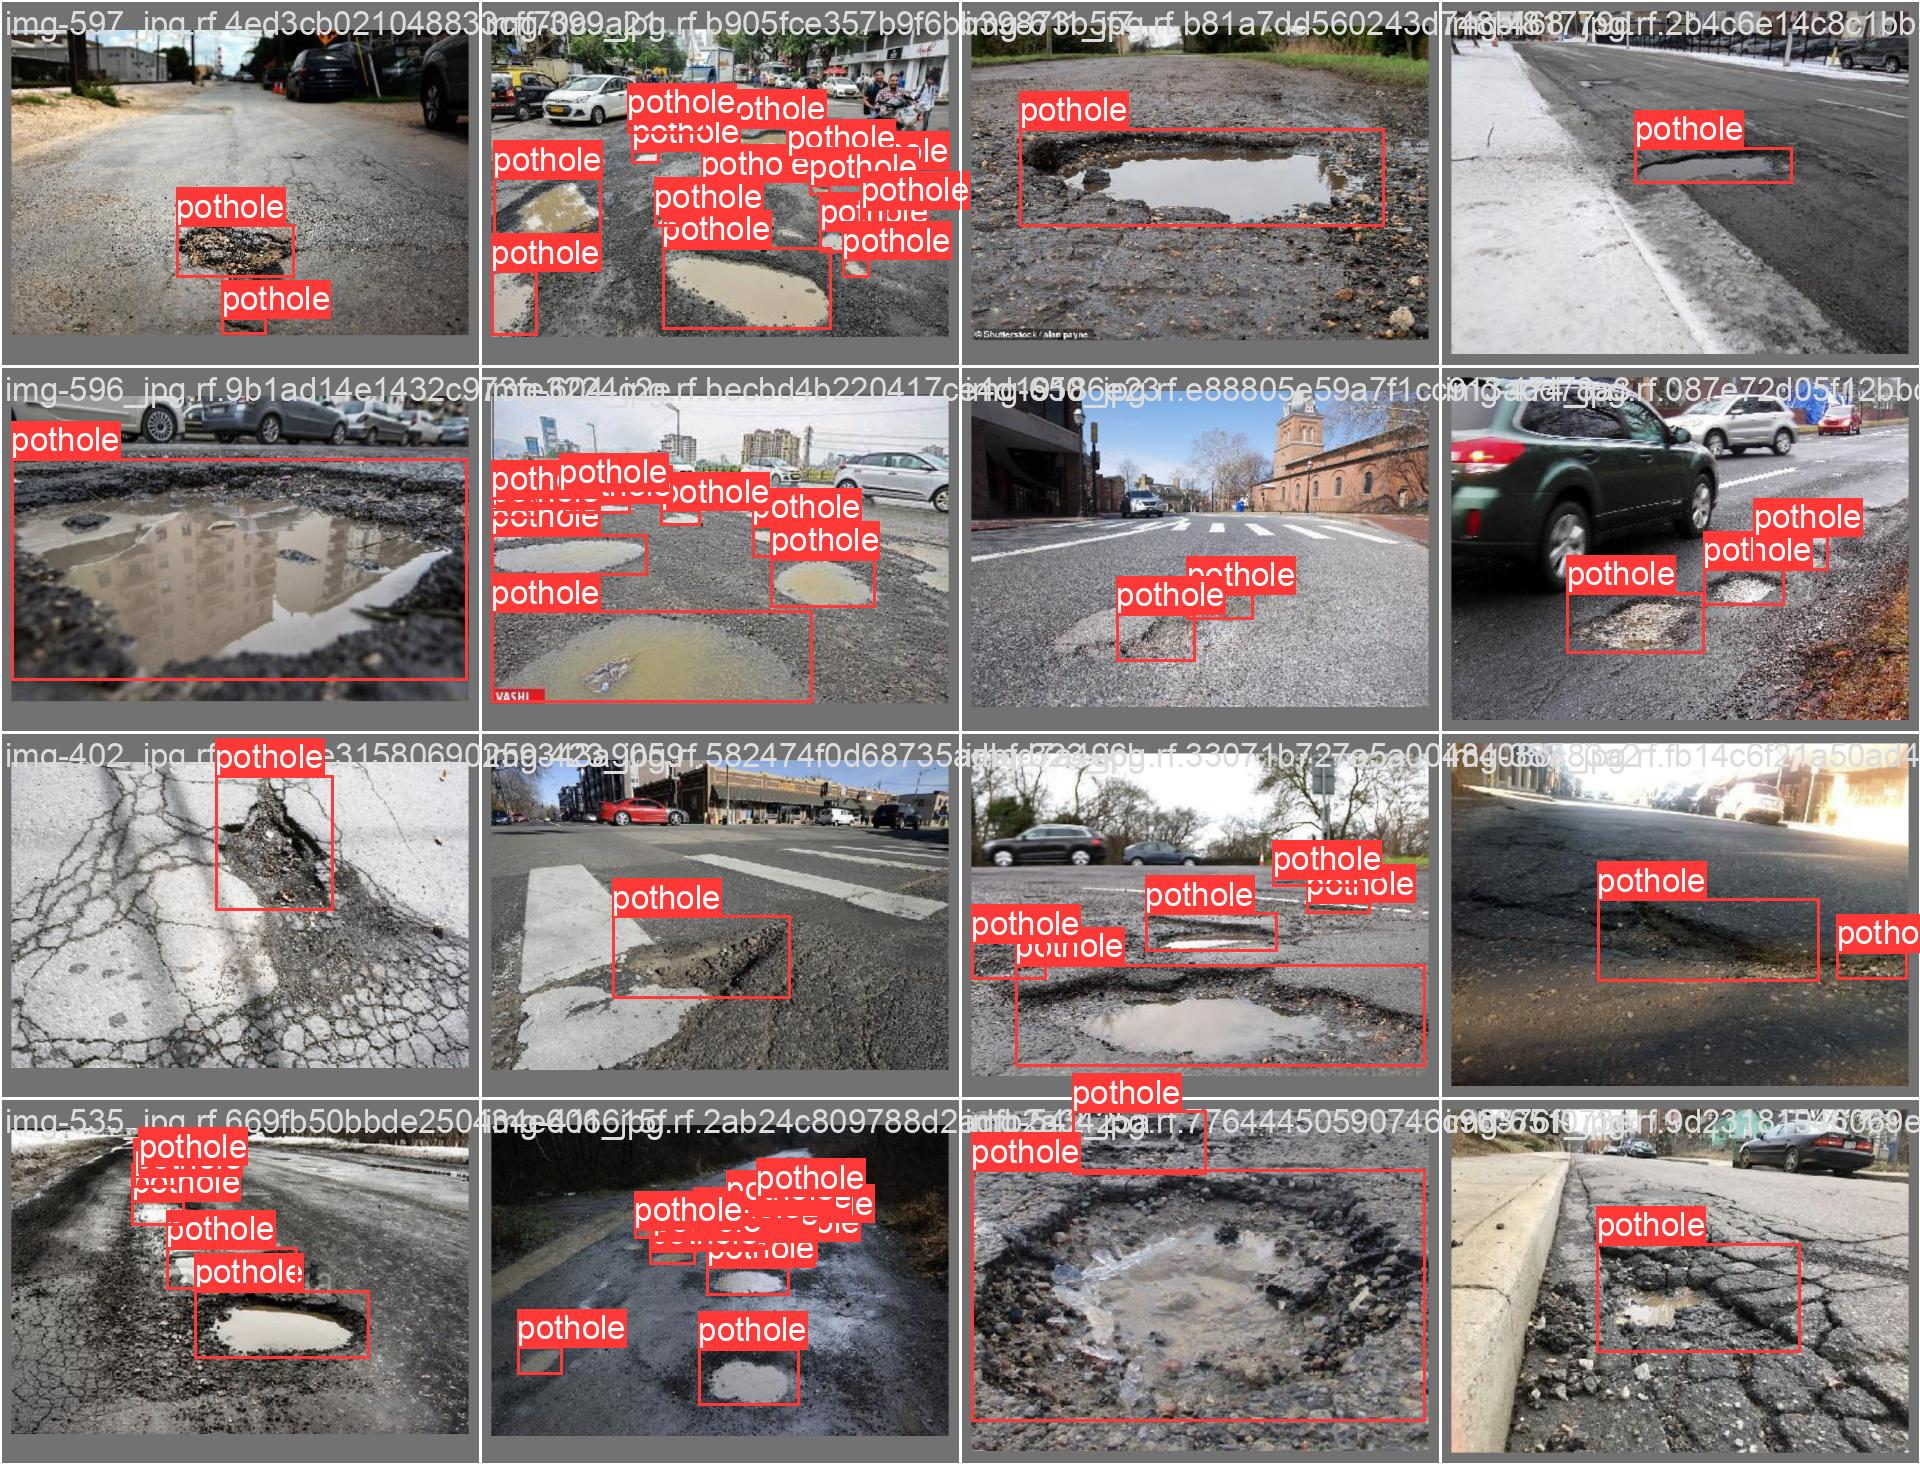

In [ ]:
import random
import glob
from IPython.display import display

Image_name=random.choice(glob.glob('/content/yolov5/runs/val/exp/*.jpg'))
display(Image(filename=Image_name))

In [ ]:
# 추론
!python detect.py --weights runs/train/pothole_results/weights/best.pt --img 640 --source ./pothole/test/images

detect: weights=['runs/train/pothole_results/weights/best.pt'], source=./pothole/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/67 /content/yolov5/pothole/test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg: 640x640 2 potholes, 11.5ms
image 2/67 /content/yolov5/pothole/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 640x640 2 potholes, 11.6ms
image 3/67 /conte

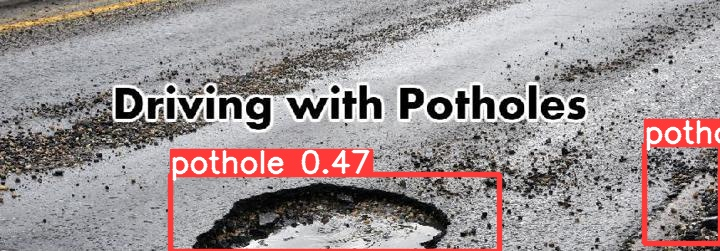

In [ ]:
Image_name=random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=Image_name))

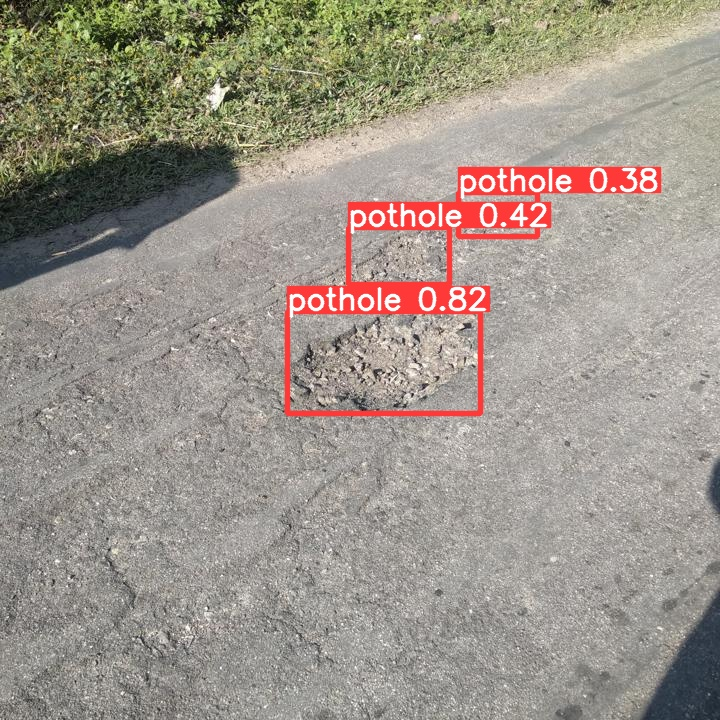

In [ ]:
Image_name=random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=Image_name))